In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import dist
from scipy.optimize import linear_sum_assignment
import random

Initial Points:
[[10  3]
 [19 11]
 [14  9]
 [ 0 16]
 [ 8 13]
 [16 12]
 [ 7 17]
 [17  4]
 [ 6 18]
 [ 4 19]]
Final Points:
[[ 9  7]
 [19 14]
 [10 19]
 [13 17]
 [17  3]
 [12  8]
 [16  0]
 [ 5 10]
 [15  9]
 [ 3 13]]
Cost Matrix:
[[ 4.12310563 14.2126704  16.         14.31782106  7.          5.38516481
   6.70820393  8.60232527  7.81024968 12.20655562]
 [10.77032961  3.         12.04159458  8.48528137  8.24621125  7.61577311
  11.40175425 14.03566885  4.47213595 16.1245155 ]
 [ 5.38516481  7.07106781 10.77032961  8.06225775  6.70820393  2.23606798
   9.21954446  9.05538514  1.         11.70469991]
 [12.72792206 19.10497317 10.44030651 13.03840481 21.40093456 14.4222051
  22.627417    7.81024968 16.55294536  4.24264069]
 [ 6.08276253 11.04536102  6.32455532  6.40312424 13.45362405  6.40312424
  15.26433752  4.24264069  8.06225775  5.        ]
 [ 8.60232527  3.60555128  9.21954446  5.83095189  9.05538514  5.65685425
  12.         11.18033989  3.16227766 13.03840481]
 [10.19803903 12.36931688 

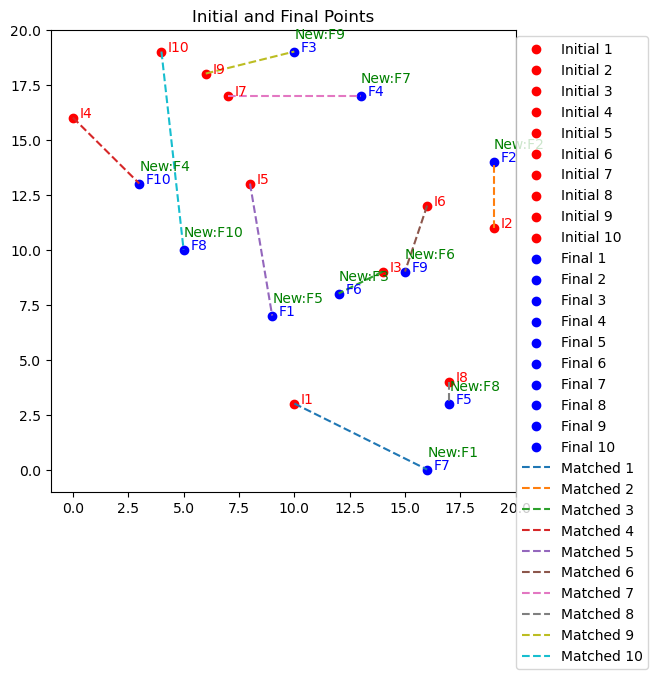

In [3]:
def create_points(point_number: int) -> np.ndarray:
    """
    Generate random points within the range (0, 20).

    Parameters
    ----------
    point_number : int
        Number of points to generate.

    Returns
    -------
    np.ndarray: 
        List of randomly generated (x, y) coordinates.
    """
    # Create random points between 1 and 20, sthen assign them to x-y coordinates
    x, y = (random.sample(range(20), point_number), random.sample(range(20), point_number))
    coordinates = list(zip(x, y))
    return np.array(coordinates)

def calculate_cost_matrix(initial_points: np.ndarray, final_points: np.ndarray) -> np.ndarray:
    """
    Calculate the cost matrix based on Euclidean distance between initial and final points.

    Parameters
    ----------
    initial_points : np.ndarray 
        Array of initial points as (x, y) coordinates.
    final_points : np.ndarray
        Array of final points as (x, y) coordinates.

    Returns
    -------
    np.ndarray: A 2D cost matrix where each element (i, j) is the distance between initial_points[i] and final_points[j].
    """
    # Initialize cost matrix
    length_matrix = len(initial_points)
    cost_matrix = np.zeros((length_matrix, length_matrix))
    
    # Create cost matrix
    for i in range(length_matrix):
        for j in range(length_matrix):
            cost_matrix[i, j] = dist(initial_points[i], final_points[j]) # Euclidean Distance
    
    return cost_matrix

def show_points(initial_points: np.ndarray, final_points: np.ndarray, final_order: np.ndarray) -> None:
    """
    Display scatter plot of initial and final points with a legend and lines between matched pairs.

    Parameters
    ----------
        initial_points : np.ndarray 
            Array of initial points as (x, y) coordinates.
        final_points : np.ndarray
            Array of final points as (x, y) coordinates.
        final_order : np.ndarray
            The optimal assignment order for the final points.
    """
    
    plt.figure(figsize=(6, 6))
    
    # Initial points in red
    for i, point in enumerate(initial_points):
        plt.scatter(point[0], point[1], color="red", label=f"Initial {i + 1}")
        plt.text(point[0] + 0.3, point[1], f"I{i + 1}", color="red")
        
    # Final points in blue
    for i, point in enumerate(final_points):
        plt.scatter(point[0], point[1], color="blue", label=f"Final {i + 1}")
        plt.text(point[0] + 0.3, point[1], f"F{i + 1}", color="blue")
        
    # Lines between the points in green
    for i,j in enumerate(final_order):
        plt.plot([initial_points[i][0], final_points[j][0]], 
                 [initial_points[i][1], final_points[j][1]], 
                 linestyle="--", label=f"Matched {i + 1}")
        plt.text(final_points[j][0], final_points[j][1] + 0.6, f"New:F{i+1}", color="green")
    
    # Set limits and labels, add legend
    plt.xlim(-1, 20)
    plt.ylim(-1, 20)
    plt.title("Initial and Final Points")
    plt.legend(bbox_to_anchor = (1.3,1))
    plt.show()
    
    
def swap_final_points(final_points: np.ndarray, new_point_order: np.ndarray) -> np.ndarray:
    """
    Reorder the final points based on the optimal assignment.

    Parameters
    ----------
    final_points : np.ndarray
            Array of original final points.
    new_point_order : np.ndarray 
        Array of indices representing the new order for final points.

    Returns
    -------
        np.ndarray: Reordered final points according to the optimal assignment.
    """
    return final_points[new_point_order]

def munkres(cost_matrix: np.ndarray) -> tuple[np.ndarray, float, np.ndarray]:
    """
    Munkres (Hungarian) Algorithm for solving the assignment problem.

    Parameters
    ----------
    cost_matrix : np.ndarray
        The cost matrix where (i, j) represents the cost of assigning jth job to ith worker.

    Returns
    -------
    tuple[np.ndarray, float, np.ndarray]: 
        A tuple where the first element is a 2D binary matrix indicating assignments, 
        the second element is the total cost of the optimal assignment,
        and the third element is an array of column indices representing the assignment.
    """
    
    # Use scipy's linear_sum_assignment to find the optimal assignment
    row_indices, col_indices = linear_sum_assignment(cost_matrix)
    
    # Create the assignment matrix
    assignment = np.zeros_like(cost_matrix, dtype=bool)
    assignment[row_indices, col_indices] = True
    
    # Calculate the total cost
    cost = cost_matrix[row_indices, col_indices].sum()
    
    return assignment, cost, col_indices


def main():
    # Create the points
    initial_points = create_points(10)
    final_points = create_points(10)
    print(f"Initial Points:\n{initial_points}")
    print(f"Final Points:\n{final_points}")
    
    # TODO: Bu üçünü birleştir
    # Create the cost matrix
    cost_matrix = calculate_cost_matrix(initial_points, final_points)
    print(f"Cost Matrix:\n{cost_matrix}")
    
    # Do the munkres algorithm
    assigned_matrix, cost, column_indices = munkres(cost_matrix)
    print(f"Assigned Matrix:\n{assigned_matrix}")
    
    # Change the order of the final points
    new_final_points = swap_final_points(final_points, column_indices)
    print(f"New Final Points Order:\n{new_final_points}")
    ######
    
    # Show all points
    show_points(initial_points, final_points, column_indices)
    
    
main()